In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:18pt;}
div.output {font-size:19pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:19px;}
</style>
"""))

# 1. tensorflow v2.xx에서 v1 사용하기

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # v2비활성화하고 v1을 활성화
import numpy as np
import pandas as pd

Instructions for updating:
non-resource variables are not supported in the long term


## Tensorflow
- 그래프 정의 (tensor객체의 흐름)
- sess = tf.Session()을 실행
- sess.run()을 통해 변수값을 확인할 수 있음

In [7]:
# tensor = data(상수,변수)와 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))
print(sess.run(node1).decode())

b'Hello, Tensorflow'
Hello, Tensorflow


In [8]:
# 간단한 수학 연산 tensor 그래프
node1 = tf.constant(10, dtype=tf.float16)
node2 = tf.constant(20, dtype=tf.float16)
node3 = tf.add(node1, node2)
sess = tf.Session()
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


In [4]:
# 타입 변경
import numpy as np
node1 = tf.constant(np.array([1,2,3]),  dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
sess.run([node1, node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [11]:
# 평균값 계산 : tf.reduce_mean()
data = np.array([1., 2., 3., 4.])
m = tf.reduce_mean(data)
sess = tf.Session()
sess.run(m)

2.5

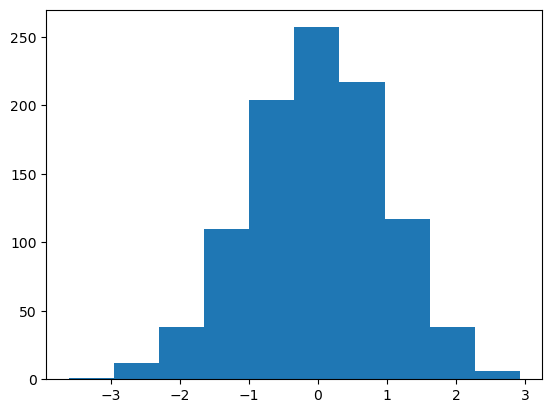

In [21]:
# tf.random_normal([size]) : 평균0이고, 표준편차가 1인 난수 size 개 발생. 난수갯수:독립변수갯수
import matplotlib.pyplot as plt
tensor = tf.random_normal([1000]) # 평균0, 표준편차가 1인 난수 2(정규분포 난수)
sess = tf.Session()
plt.hist(sess.run(tensor))
plt.show()

# 2. tensorflow v1을 이용한  linear regression을 구현
## 2.1 독립변수 x가 1개, 종속변수 y가 1개

In [35]:
# tensor 그래프(객체 흐름) 정의
#data set(x, y)
x = np.array([1,2,3])
y = np.array([1,2,3])
# weight와 bias (처음에는 랜덤값으로 셋팅했다가, 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis : 결과는 넘파이 배열
H = W*x + b
# cost function (손실함수 = mse : 최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))
'''
학습 목적 : cost가 최소가 되는 W, b를 찾는 것
cost 함수는 2차함수이므로 곡선 그래프. 곡선위 미분값이 줄어드는 방향으로 학습(경사하강법)
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
#Session 생성
sess = tf.Session()
# tf.Variable 변수 노드(W, b) 초기화
sess.run(tf.global_variables_initializer())
# 6000번 학습 (v2에서의 fit함수)
for step in range(6001):
    _, cost_val, W_val, b_val =sess.run([train, cost, W, b])
    if step%300 == 0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step, 
                                            cost_val,
                                            W_val,
                                            b_val))

0번째 cost:0.9739561080932617, W:[0.81470054], b:[-0.60462695]
300번째 cost:0.006502692122012377, W:[1.0936575], b:[-0.21290551]
600번째 cost:0.0015343638369813561, W:[1.0454946], b:[-0.10342002]
900번째 cost:0.00036204769276082516, W:[1.0220994], b:[-0.05023702]
1200번째 cost:8.54278914630413e-05, W:[1.0107348], b:[-0.02440285]
1500번째 cost:2.0158335246378556e-05, W:[1.0052147], b:[-0.01185405]
1800번째 cost:4.756914677273016e-06, W:[1.0025332], b:[-0.00575839]
2100번째 cost:1.1229629990339163e-06, W:[1.0012308], b:[-0.00279771]
2400번째 cost:2.6545777132014337e-07, W:[1.0005988], b:[-0.00136024]
2700번째 cost:6.296439636344076e-08, W:[1.0002917], b:[-0.00066249]
3000번째 cost:1.4996633268538062e-08, W:[1.0001423], b:[-0.00032328]
3300번째 cost:3.5581297908038323e-09, W:[1.0000694], b:[-0.00015744]
3600번째 cost:8.453640010230856e-10, W:[1.0000336], b:[-7.6823686e-05]
3900번째 cost:2.0402980693834394e-10, W:[1.0000167], b:[-3.7661277e-05]
4200번째 cost:6.361376703178934e-11, W:[1.0000095], b:[-2.0799982e-05]
4500

In [36]:
# 최종적으로 나온 회귀식 : H = W*x + b
sess.run([W, b])

[array([1.0000044], dtype=float32), array([-8.861246e-06], dtype=float32)]

In [38]:
W_, b_ = sess.run([W, b])
W_, b_

(array([1.0000044], dtype=float32), array([-8.861246e-06], dtype=float32))

In [39]:
print('최종 회귀식 : H = {}*x + {}'.format(W_[0], b_[0]))

최종 회귀식 : H = 1.0000044107437134*x + -8.861245987645816e-06


In [40]:
def to_predict(x):
    return W_[0]*x + b_[0]

In [41]:
to_predict(3)

3.0000043709851525

## 2.2 predict을 하기 위한 placeholder 이용
- placeholder : 외부에서 데이터를 입력받을 수 있는 노드

In [45]:
a = tf.placeholder(tf.float16)
b = tf.placeholder(tf.float16)
ab = tf.add(a, b)
sess = tf.Session()
sess.run([a, b, ab], feed_dict={a : 10,
                                b : 20})

[array(10., dtype=float16), array(20., dtype=float16), 30.0]

In [47]:
sess.run(ab, feed_dict={a:np.array([1,2,3]),
                        b:np.array([1,2,3]) })

array([2., 4., 6.], dtype=float16)

In [64]:
# data set (H = 2x + 1)
x_data = np.array([1,2,3,5,8])
y_data = np.array([3,5,7,11,17])

# placeholder 설정(x, y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis
H = W*x + b
# cost function == loss function
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# session 생성 & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습 6000번
for step in range(10000):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                        feed_dict={x:x_data,
                                                   y:y_data})
    if step % 300 == 0:
        print("{}/6000번째 cost:{}, W:{}, b:{}".format(step+1,
                                                     cost_val, 
                                                     W_val,
                                                     b_val))

1/6000번째 cost:59.58295822143555, W:[0.6043779], b:[-0.5948063]
301/6000번째 cost:0.015323905274271965, W:[2.0423427], b:[0.7736791]
601/6000번째 cost:0.0004727148334495723, W:[2.007437], b:[0.9602501]
901/6000번째 cost:1.458507358620409e-05, W:[2.0013063], b:[0.9930182]
1201/6000번째 cost:4.5029361217530095e-07, W:[2.0002296], b:[0.99877334]
1501/6000번째 cost:1.3988073810367041e-08, W:[2.0000405], b:[0.9997839]
1801/6000번째 cost:4.49745130026713e-10, W:[2.0000074], b:[0.99996156]
2101/6000번째 cost:2.1793766444289098e-11, W:[2.0000017], b:[0.99999195]
2401/6000번째 cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2701/6000번째 cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
3001/6000번째 cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
3301/6000번째 cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
3601/6000번째 cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
3901/6000번째 cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
4201/6000번째 cost:2.060005464821213

In [65]:
# 최종 W, b
sess.run([W, b])

[array([2.0000017], dtype=float32), array([0.99999213], dtype=float32)]

In [66]:
# 예측하기
sess.run(H, feed_dict={x:5})

array([11.000001], dtype=float32)

In [67]:
sess.run(H, feed_dict={x: np.array([5,6,7])})

array([11.000001, 13.000002, 15.000004], dtype=float32)

## 2.3 scale 이 다른 데이터들의 linear regression 구현(scale 조정 X)

In [70]:
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])

# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]))
# Hypothesis
H = W*x + b
# cost function(less function ; 손실함수)
cost = tf.reduce_mean(tf.square(H - y))
# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cost)
# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                        feed_dict={x:x_data,
                                                   y:y_data})
    if step%300==1:
        print("{}/6000번째 cost:{}, W:{}, b:{}".format(step,
                                                    cost_val,
                                                    W_val,
                                                    b_val))

1/6000번째 cost:4450.2353515625, W:[-0.50166523], b:[0.12365787]
301/6000번째 cost:117.51522064208984, W:[8.960878], b:[1.369863]
601/6000번째 cost:80.33758544921875, W:[9.84079], b:[1.4574871]
901/6000번째 cost:79.98835754394531, W:[9.925944], b:[1.438327]
1201/6000번째 cost:79.95591735839844, W:[9.937448], b:[1.4097615]
1501/6000번째 cost:79.9272689819336, W:[9.942055], b:[1.3807998]
1801/6000번째 cost:79.8996353149414, W:[9.945975], b:[1.3522693]
2101/6000번째 cost:79.87296295166016, W:[9.949732], b:[1.3242435]
2401/6000번째 cost:79.84724426269531, W:[9.953451], b:[1.29672]
2701/6000번째 cost:79.82240295410156, W:[9.957168], b:[1.2696729]
3001/6000번째 cost:79.79840087890625, W:[9.96073], b:[1.2430979]
3301/6000번째 cost:79.77529907226562, W:[9.964227], b:[1.2170018]
3601/6000번째 cost:79.75300598144531, W:[9.9676695], b:[1.1913754]
3901/6000번째 cost:79.73146057128906, W:[9.971103], b:[1.1662008]
4201/6000번째 cost:79.71070098876953, W:[9.974474], b:[1.141457]
4501/6000번째 cost:79.69066619873047, W:[9.977731], b

In [71]:
# 예측
sess.run(H, feed_dict={x:5})

array([50.968426], dtype=float32)

In [ ]:
# cost값이 멈춤 : local 최소값

## 2.4 scale이 다른 데이터들의 linear regression을 구현(조정 O)
### scale을 맞추기 : 모든 데이터를 일정 범위내로 조정
- normalization(정규화) : 데이터의 최대값을 1, 최소값을 0으로 조정
                      x - Xmin
    normalization = ─────────────
                     Xmax - Xmin
        * 위의 식을 써도 되지만 라이브러리를 주로 씀(sklearn.preprocessing.MinMaxScaler이용)
        
- standardization(표준화) : 데이터의 평균을 0, 표준편차를 1로 조정
                        x - Xmean(평균)
    standardization = ───────────────
                       Xstd(표준편차)
          * 위의 식을 써도 되지만 라이브러리를 주로 씀(sklearn.preprocessing.StandardScaler이용)

In [10]:
# 라이브러리를 쓰지 않고 정규화 : 예측할 경우 x데이터를 스케일변환, 스케일된 예측값을 변환이 번거로워
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])

scaled_x_data = (x_data - x_data.min()) / (x_data.max() - x_data.min())
scaled_y_data = (y_data - y_data.min()) / (y_data.max() - y_data.min())
print(scaled_x_data)
print(scaled_y_data)

[0.         0.11111111 0.44444444 0.77777778 1.        ]
[0.         0.11111111 0.7        0.83333333 1.        ]


In [15]:
# 라이브러리를 쓰고 정규화
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([5,15,68,80,95]).reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() # x_data를 표준화시킬 객체
scaler_x.fit(x_data)
scaled_x_data = scaler_x.transform(x_data)
scaler_y = MinMaxScaler() # y_data를 표준화시킬 객체
scaler_y.fit(y_data)
scaled_y_data = scaler_y.transform(y_data)
np.column_stack([x_data, scaled_x_data, y_data, scaled_y_data])

array([[ 1.        ,  0.        ,  5.        ,  0.        ],
       [ 2.        ,  0.11111111, 15.        ,  0.11111111],
       [ 5.        ,  0.44444444, 68.        ,  0.7       ],
       [ 8.        ,  0.77777778, 80.        ,  0.83333333],
       [10.        ,  1.        , 95.        ,  1.        ]])

In [19]:
# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]))
# Hypothesis
H = W*x + b
# cost function(less function ; 손실함수)
cost = tf.reduce_mean(tf.square(H - y))
# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)
# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 10001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                        feed_dict={x:scaled_x_data,
                                                   y:scaled_y_data})
    if step%300==1:
        print("{}/10000번째 cost:{}, W:{}, b:{}".format(step,
                                                    cost_val,
                                                    W_val,
                                                    b_val))

1/10000번째 cost:1.524968147277832, W:[-0.9024801], b:[-0.04032834]
301/10000번째 cost:0.5539530515670776, W:[-0.5626051], b:[0.36436835]
601/10000번째 cost:0.30999842286109924, W:[-0.35655326], b:[0.53182155]
901/10000번째 cost:0.23214776813983917, W:[-0.21684825], b:[0.5886936]
1201/10000번째 cost:0.1944853961467743, W:[-0.11137301], b:[0.5947754]
1501/10000번째 cost:0.16845306754112244, W:[-0.02474577], b:[0.5782428]
1801/10000번째 cost:0.14731910824775696, W:[0.05048723], b:[0.5523263]
2101/10000번째 cost:0.12927815318107605, W:[0.1180185], b:[0.52319294]
2401/10000번째 cost:0.11366593837738037, W:[0.17975044], b:[0.4936778]
2701/10000번째 cost:0.10010721534490585, W:[0.2367285], b:[0.4650445]
3001/10000번째 cost:0.08832108974456787, W:[0.28958276], b:[0.43781894]
3301/10000번째 cost:0.0780733972787857, W:[0.33873764], b:[0.41218296]
3601/10000번째 cost:0.0691627711057663, W:[0.38451225], b:[0.38816008]
3901/10000번째 cost:0.06141462177038193, W:[0.42716736], b:[0.36570323]
4201/10000번째 cost:0.054677277803421

In [22]:
# 예측
scaled_input = scaler_x.transform(np.array([[2]]))
print("2를 스케일 조정된 값 :",scaled_input)
scaled_output = sess.run(H, feed_dict={x:scaled_input})
print('예측값 :', scaler_y.inverse_transform(scaled_output))

2를 스케일 조정된 값 : [[0.11111111]]
예측값 : [[25.424423]]


In [31]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)
np.column_stack([y_data, y_hat])

array([[ 5.        , 16.68609238],
       [15.        , 25.42442322],
       [68.        , 51.63942337],
       [80.        , 77.85442352],
       [95.        , 95.33108521]])

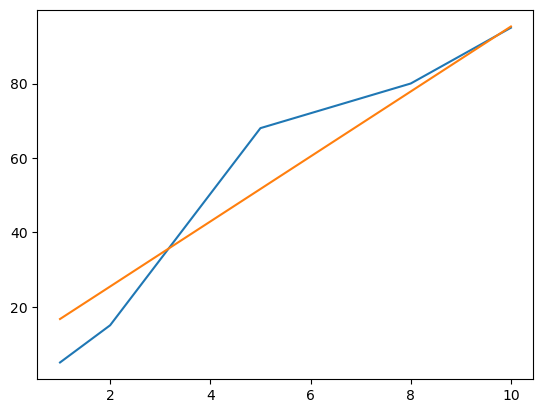

In [33]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data)
plt.plot(x_data, y_hat)
plt.show()

In [42]:
x_data, x_data.ravel(), x_data.flatten(), x_data[:,0]

(array([[ 1],
        [ 2],
        [ 5],
        [ 8],
        [10]]),
 array([ 1,  2,  5,  8, 10]),
 array([ 1,  2,  5,  8, 10]),
 array([ 1,  2,  5,  8, 10]))

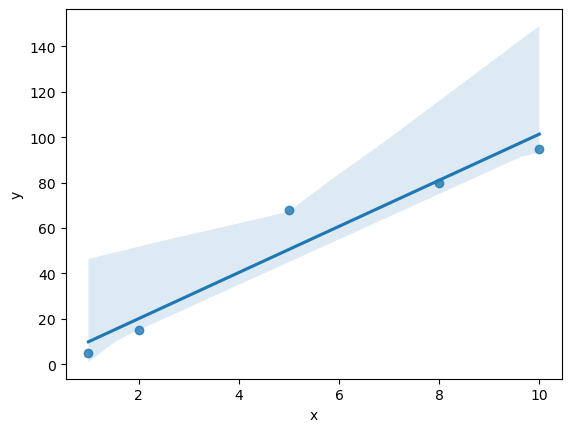

In [43]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame({'x':x_data[:,0],
                   'y':y_data[:,0]})
sns.regplot(data=df, x='x', y='y')
plt.show()

In [46]:
# 라이브러리를 쓰지 않고 표준화
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])
scaled_x_data = (x_data - x_data.mean()) / x_data.std()
scaled_y_data = (y_data - y_data.mean()) / y_data.std()
print(scaled_x_data, scaled_y_data)

[-1.22474487 -0.93313895 -0.05832118  0.81649658  1.39970842] [-1.32373476 -1.04563922  0.42826713  0.76198177  1.17912508]


In [55]:
# 라이브러리를 써서 표준화
x_data = np.array([1,2,5,8,10]).reshape(-1, 1)
y_data = np.array([5,15,68,80,95]).reshape(-1,1)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler() # x_data를 표준화할 객체
scaler_x.fit(x_data)
scaled_x_data = scaler_x.transform(x_data)
scaler_y = StandardScaler() # y_data를 표준화할 객체
scaler_y.fit(y_data)
scaled_y_data = scaler_y.transform(y_data)
print(np.column_stack([x_data, scaled_x_data]))
print(np.column_stack([y_data, scaled_y_data]))

[[ 1.         -1.22474487]
 [ 2.         -0.93313895]
 [ 5.         -0.05832118]
 [ 8.          0.81649658]
 [10.          1.39970842]]
[[ 5.         -1.32373476]
 [15.         -1.04563922]
 [68.          0.42826713]
 [80.          0.76198177]
 [95.          1.17912508]]


In [57]:
# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]))
# Hypothesis
H = W*x + b
# cost function(less function ; 손실함수)
cost = tf.reduce_mean(tf.square(H - y))
# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)
# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 10001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                        feed_dict={x:scaled_x_data,
                                                   y:scaled_y_data})
    if step%1000==1:
        print("{}/10000번째 cost:{}, W:{}, b:{}".format(step,
                                                    cost_val,
                                                    W_val,
                                                    b_val))

1/10000번째 cost:7.165692329406738, W:[0.0559654], b:[2.5041988]
1001/10000번째 cost:0.19080738723278046, W:[0.84560764], b:[0.33822855]
2001/10000번째 cost:0.06356845051050186, W:[0.9522603], b:[0.04568268]
3001/10000번째 cost:0.061247318983078, W:[0.9666655], b:[0.0061701]
4001/10000번째 cost:0.06120496988296509, W:[0.96861076], b:[0.00083336]
5001/10000번째 cost:0.06120418757200241, W:[0.96887314], b:[0.00011256]
6001/10000번째 cost:0.06120418384671211, W:[0.9688999], b:[1.5208694e-05]
7001/10000번째 cost:0.06120417267084122, W:[0.9688999], b:[2.0613459e-06]
8001/10000번째 cost:0.06120417267084122, W:[0.9688999], b:[2.8556698e-07]
9001/10000번째 cost:0.061204176396131516, W:[0.9688999], b:[5.1848165e-08]


## 2.5 독립변수 x가 여러개인 linear Regression

In [11]:
# data set
x_data = np.array([[73,80,75],
                   [93,88,93],
                   [89,91,90],
                   [96,98,100],
                   [73,66,70]])
y_data = np.array([[152], [185], [180],[196],[142]])
# tensor graph 정의
# shape=[None, 3] : x_data([5,3]도 받고, 예측할때는 [1,3]. 3열만 고정
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)
# weight & bias (weight 3개, bias 1개)
W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]),    name='bias')
# Hypothesis
# H = X@W + b ; tf.matmul(X, W) - 행렬곱
H = tf.matmul(X, W) + b
# cost
cost = tf.reduce_mean(tf.square(H-Y))
#train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# session 생성과 Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 40001):
    _, cost_val = sess.run([train, cost],
                          feed_dict={X:x_data,
                                     Y:y_data})
    if step%5000==1:
        print('{}번째 cost:{}'.format(step, cost_val))
print('최종 cost:{}'.format(cost_val))

1번째 cost:36082.21875
5001번째 cost:0.5296040177345276
10001번째 cost:0.1949850618839264
15001번째 cost:0.16314084827899933
20001번째 cost:0.15349125862121582
25001번째 cost:0.1469595730304718
30001번째 cost:0.14189696311950684
35001번째 cost:0.13791409134864807
최종 cost:0.13480018079280853


In [12]:
#예측
sess.run(H, feed_dict={X: np.array([[73,80,77],
                                    [73,80,72]])})

array([[152.83125],
       [149.5708 ]], dtype=float32)

## csv를 array로 읽어오기

In [69]:
# 방법1 : csv -> 데이터프레임 -> 넘파이배열
# 1. csv를 dataFrame 읽어와
data = pd.read_csv('data/ozone.csv')
# 2. 결측치 대체 or 삭제
#data.fillna(value=data.mean(), inplace=True)
data.dropna(how='any', axis=0, inplace=True)
X = data[['Solar.R','Wind','Temp']].values
y = data['Ozone'].values
X.shape, y.shape

((111, 3), (111,))

In [14]:
# 방법2 : csv -> 넘파이배열
# data = np.loadtxt('data/ozone_nonan.csv', delimiter=',') NAN이 없어야 함
data = np.genfromtxt('data/ozone.csv', delimiter=',', skip_header=1,
                    missing_values='NA', filling_values=np.nan)
data[:5]

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [  nan,   nan,  14.3,  56. ,   5. ,   5. ]])

In [18]:
# csv파일 -> 데이터프레임 -> 결측치 -> 넘파이 배열 -> 머신러닝
# import statsmodels.api as sm
# sm.datasets.get_rdataset('airquality').data와 동일
data = pd.read_csv('data/ozone.csv')
data.info() # 결측치 처리 필수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [24]:
data.mean() # 열별 평균

Ozone       42.129310
Solar.R    185.931507
Wind         9.957516
Temp        77.882353
Month        6.993464
Day         15.803922
dtype: float64

In [34]:
# 결측치 처리 방법 1 : 결측치 행을 제거
# data.dropna(how='any', axis=0) #axis=0:기본값 생략가능. 결측치가 한열이라도 있는 행 삭제
# 결측치 처리 방법 2 : 열별 평균값으로 대체
# data.fillna(value=data.mean())
# 결측치 처리방법 3 : 열별월별 평균값으로 대체
mean_data = data.groupby('Month')[['Ozone','Solar.R']].mean()
mean_data.loc[5, 'Ozone']

23.615384615384617

In [49]:
def fill_nan(row):
    "row['Ozone']과 row['Solar.R']값이 결측치면 mean_data.loc[월, 열이름]으로 대체"
    # pd.options.mode.copy_on_write = True
    row = row.copy()
    if row.isna()['Ozone'] :
        row['Ozone'] = mean_data.loc[row['Month'], 'Ozone']
    if row.isna()['Solar.R']:
        row['Solar.R'] = mean_data.loc[row.Month, 'Solar.R']
    return row
# fill_nan(data.loc[4]), data.loc[4]
data = data.apply(fill_nan, axis=1)
data = data[['Ozone', 'Solar.R', 'Wind', 'Temp']]
data.head()

,Ozone,Solar.R,Wind,Temp
0,41.000000,190.000000,7.4,67.0
1,36.000000,118.000000,8.0,72.0
2,12.000000,149.000000,12.6,74.0
3,18.000000,313.000000,11.5,62.0
4,23.615385,181.296296,14.3,56.0


In [71]:
# 독립변수 & 종속변수 (values:판다스 데이터를 넘파이배열로 )
x_data = data[['Solar.R','Wind','Temp']].values
x_data = data.iloc[:, 1:].values
y_data = data['Ozone'].values.reshape(-1, 1)
y_data = data[['Ozone']].values
x_data.shape, y_data.shape

# tensorflow 구현
# 1. X, y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. 독립변수 3개, 종속변수 1개인 모델의 weight, bias
W = tf.Variable(tf.random_normal([3,1]))
b = tf.Variable(tf.random_normal([1]))
# 3. Hypothesis
H = tf.matmul(X, W) + b
# 4. cost함수=loss함수=손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# sess객체 생성 & W,b 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 15001):
    _, cost_val = sess.run([train, cost], feed_dict={X : x_data,
                                                     y : y_data})
    if step%2000==1:
        print("{}번째 cost : {}".format(step, cost_val))
print("최종 cost : {}, W:{}, b:{}".format(cost_val, sess.run(W), sess.run(b)))

1번째 cost : 10088.9384765625
2001번째 cost : 511.2201843261719
4001번째 cost : 473.9792785644531
6001번째 cost : 464.6089782714844
8001번째 cost : 462.24163818359375
10001번째 cost : 461.6338806152344
12001번째 cost : 461.4682922363281
14001번째 cost : 461.4138488769531
최종 cost : 461.39898681640625, W:[[ 0.05528564]
 [-3.5556645 ]
 [ 0.86666024]], b:[-1.0285498]


In [72]:
# 예측하기 (독립변수 118, 8, 72면 종속변수는 얼마?)
input_data = np.array([[118, 8, 72]])
sess.run(H, feed_dict={X:input_data})

array([[39.449375]], dtype=float32)

In [82]:
# MinMaxScaler나 StandardScaler을 이용하여 스케일 조정 후 tensorflow 수행
# 주로 0~1사이      주로 0근처
data = pd.read_csv('data/ozone.csv')
# 결측치 처리
mean_data = data.groupby('Month')[['Ozone','Solar.R']].mean()
def fill_nan(row):
    "row['Ozone']과 row['Solar.R']값이 결측치면 mean_data.loc[월, 열이름]으로 대체"
    # pd.options.mode.copy_on_write = True
    row = row.copy()
    if row.isna()['Ozone'] :
        row['Ozone'] = mean_data.loc[row['Month'], 'Ozone']
    if row.isna()['Solar.R']:
        row['Solar.R'] = mean_data.loc[row.Month, 'Solar.R']
    return row
# fill_nan(data.loc[4]), data.loc[4]
data = data.apply(fill_nan, axis=1)
data = data[['Ozone', 'Solar.R', 'Wind', 'Temp']]
# 독립변수 & 종속변수 (values:판다스 데이터를 넘파이배열로 )
x_data = data.iloc[:, 1:].values
y_data = data[['Ozone']].values
# 독립변수와 종속변수의 scale 조정
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaled_x_data = scaler_x.fit_transform(x_data)
scaler_y = StandardScaler()
scaled_y_data = scaler_y.fit_transform(y_data)
scaled_x_data.shape, scaled_y_data.shape

((153, 3), (153, 1))

In [83]:
# tensorflow 구현
# 1. X, y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. 독립변수 3개, 종속변수 1개인 모델의 weight, bias
W = tf.Variable(tf.random_normal([3,1]))
b = tf.Variable(tf.random_normal([1]))
# 3. Hypothesis
H = tf.matmul(X, W) + b
# 4. cost함수=loss함수=손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# sess객체 생성 & W,b 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 40001):
    _, cost_val = sess.run([train, cost], feed_dict={X : scaled_x_data,
                                                     y : scaled_y_data})
    if step%3000==1:
        print("{}번째 cost : {}".format(step, cost_val))
print("최종 cost : {}".format(cost_val))

1번째 cost : 1.219386339187622
3001번째 cost : 1.137768030166626
6001번째 cost : 1.0657583475112915
9001번째 cost : 1.0021839141845703
12001번째 cost : 0.9460245966911316
15001번째 cost : 0.8963844180107117
18001번째 cost : 0.8524808287620544
21001번째 cost : 0.8136303424835205
24001번째 cost : 0.7792289853096008
27001번째 cost : 0.748750627040863
30001번째 cost : 0.7217325568199158
33001번째 cost : 0.6977702379226685
36001번째 cost : 0.6765055656433105
39001번째 cost : 0.657624363899231
최종 cost : 0.6518182754516602


In [84]:
# 예측하기 (독립변수 118, 8, 72면 종속변수는 얼마?)
input_data = np.array([[118, 8, 72]])
predict_data = sess.run(H, feed_dict={X : scaler_x.transform(input_data)})
scaler_y.inverse_transform(predict_data)

array([[37.47996]], dtype=float32)

# 3. logistic Regression = Binary classification (binary 분류분석)
- logistic 회귀분석 : 기존의 회귀분석과는 다른 처리가 필요  

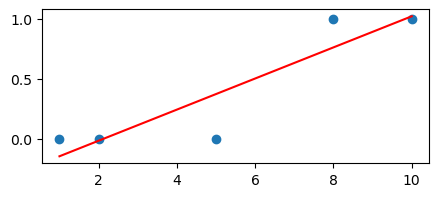

In [91]:
from scipy import stats
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2))
x = np.array([1, 2, 5, 8, 10])
y = np.array([0, 0, 0, 1, 1]) # 실제값
lm = stats.linregress(x, y)
H = lm[0]*x + lm[1] # 예측값
plt.scatter(x, y)
plt.plot(x, H, 'r')
plt.show()

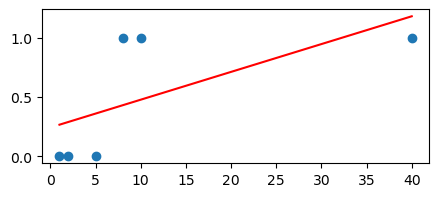

In [92]:
plt.figure(figsize=(5,2))
x = np.array([1, 2, 5, 8, 10, 40])
y = np.array([0, 0, 0, 1, 1, 1]) # 실제값
lm = stats.linregress(x, y)
H = lm[0]*x + lm[1] # 예측값
plt.scatter(x, y)
plt.plot(x, H, 'r')
plt.show()

In [14]:
# 교안 pt. 50
x_data = np.array([[10,0],
                   [8, 1],
                   [3, 3],
                   [2, 3],
                   [5, 1],
                   [2, 0],
                   [1, 0]])
y_data = np.array([[1],[1],[1],[1],[0],[0],[0]])
# X, y
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
y = tf.placeholder(shape=[None,1], dtype=tf.float32)
# 독립변수가 2개, 종속변수가 1개인 weight & bias
W = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random_normal([1]))
# Hypothesis
logits = tf.matmul(X, W) + b
H      = tf.sigmoid(logits)
# cost 함수
# cost = tf.reduce_mean(tf.square(H - y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
# sess & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 8001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, 
                                                    y:y_data})
    if step%600==1:
        print("{}번째 cost:{}".format(step, cost_val))
print("최종 cost:{}".format(cost_val))

1번째 cost:2.177983522415161
601번째 cost:0.24091240763664246
1201번째 cost:0.18789896368980408
1801번째 cost:0.16079473495483398
2401번째 cost:0.14174386858940125
3001번째 cost:0.12691041827201843
3601번째 cost:0.11482954025268555
4201번째 cost:0.10474510490894318
4801번째 cost:0.09619041532278061
5401번째 cost:0.08884552866220474
6001번째 cost:0.0824776217341423
6601번째 cost:0.07691045850515366
7201번째 cost:0.07200737297534943
7801번째 cost:0.06766076385974884
최종 cost:0.06632668524980545


In [20]:
# accuracy
predict = tf.cast(H>=0.5, dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
# sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델의 정확도 :', sess.run(accuracy, feed_dict={X:x_data,
                                                      y:y_data})*100, '%')

모델의 정확도 : 100.0 %


In [22]:
# 모델 사용하기 == 예측하기
input_data = np.array([[10,3]])
sess.run(predict, feed_dict={X:input_data})

array([[1.]], dtype=float32)

# 4. 분류분석
- 종속변수가 2개 이상
- 교안 54pt

In [35]:
x_data = np.array([[10,7, 8, 5],
                   [8, 8, 9, 4],
                   [7, 8, 2, 3],
                   [6, 3, 9, 3],
                   [7, 5, 7, 4],
                   [3, 5, 6, 2],
                   [2, 4, 3, 1]])
y_data = np.array([["A"],
                   ["A"],
                   ["B"],
                   ["B"],
                   ["B"],
                   ["C"],
                   ["C"]])
# 종속변수가 다중분류면 원핫인코딩 (교안 58pt)
# 원핫인코딩 방법1
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
# to_categorical(y_data)
encoder = LabelEncoder()
labeled_y_data = encoder.fit_transform(y_data.ravel())
onehot_y_data = to_categorical(labeled_y_data) # to_categorical의 결과는 넘파이배열
onehot_y_data
# 원핫인코딩 방법2
from sklearn.preprocessing import LabelEncoder
import pandas as pd
# to_categorical(y_data)
encoder = LabelEncoder()
labeled_y_data = encoder.fit_transform(y_data.ravel())
onehot_y_data = pd.get_dummies(labeled_y_data).values # d.get_dummies의 결과 데이터프레임
onehot_y_data
# 원핫인코딩 방법3
onehot_y_data = pd.get_dummies(y_data.ravel()).values
x_data.shape, onehot_y_data.shape

((7, 4), (7, 3))

In [36]:
x_data # 독립변수

array([[10,  7,  8,  5],
       [ 8,  8,  9,  4],
       [ 7,  8,  2,  3],
       [ 6,  3,  9,  3],
       [ 7,  5,  7,  4],
       [ 3,  5,  6,  2],
       [ 2,  4,  3,  1]])

In [37]:
onehot_y_data # 종속변수

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [46]:
# X, y
X = tf.placeholder(shape=[None,4], dtype=tf.float32)
Y = tf.placeholder(shape=[None,3], dtype=tf.float32)
# 독립변수가 4개, 종속변수가 3개인 weight & bias
W = tf.Variable(tf.random_normal([4,3]))
b = tf.Variable(tf.random_normal([3]))
# Hypothesis
logits = tf.matmul(X, W) + b
# H      = tf.sigmoid(logits) binary classfication(이진분류) 일 경우
H = tf.nn.softmax(logits) # softmax : 종속변수들의 합이 1

# cost 함수
# cost = tf.reduce_mean(tf.square(H - y))
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                                 labels=Y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
# sess & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, 
                                                    Y: onehot_y_data})
    if step%600==1:
        print("{}번째 cost:{}".format(step, cost_val))
print("최종 cost:{}".format(cost_val))

1번째 cost:7.143826484680176
601번째 cost:1.3599978685379028
1201번째 cost:0.8316871523857117
1801번째 cost:0.05237600579857826
2401번째 cost:0.04360887408256531
3001번째 cost:0.038291312754154205
3601번째 cost:0.034418921917676926
4201번째 cost:0.03136429935693741
4801번째 cost:0.028852058574557304
5401번째 cost:0.026732852682471275
6001번째 cost:0.024913525208830833
6601번째 cost:0.02333092875778675
7201번째 cost:0.021939817816019058
7801번째 cost:0.02070644497871399
8401번째 cost:0.019604917615652084
9001번째 cost:0.018614714965224266
9601번째 cost:0.017719654366374016
최종 cost:0.017170513048768044


In [47]:
# 예측하기
input_data = np.array([[10,  7,  8,  5]])
y_hat = sess.run(H, feed_dict={X:input_data})
print(y_hat)
print(y_hat.argmax(axis=1)) # argmax(axis=1)) : 행별 최대값이 있는 index

[[9.6800631e-01 3.1993736e-02 1.7594679e-12]]
[0]


In [51]:
# accuracy 측정
# H(예측값) : 0.99 0.005 0.005 -> H.argmax -> 0
# Y(실제값) :   1    0    0    -> Y.argmax -> 0
predict = tf.argmax(H, axis=1)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, tf.argmax(Y, axis=1))
# sess.run(correct, feed_dict={X:x_data, Y:onehot_y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print(sess.run(accuracy, feed_dict={X:x_data, Y:onehot_y_data})*100, '%')

100.0 %


# 5. XOR(교안 77pt)

In [56]:
# dataset
x_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])
y_data = np.array([[0],
                   [1],
                   [1],
                   [0]])
# X, y
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
y = tf.placeholder(shape=[None,1], dtype=tf.float32)
# 독립변수가 2개, 종속변수가 1개인 weight & bias
W = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random_normal([1]))
# Hypothesis
logits = tf.matmul(X, W) + b
H      = tf.sigmoid(logits)
# cost 함수
# cost = tf.reduce_mean(tf.square(H - y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# sess & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, 
                                                    y:y_data})
    if step%600==1:
        print("{}번째 cost:{}".format(step, cost_val))
print("최종 cost:{}".format(cost_val))

1번째 cost:0.7890697121620178
601번째 cost:0.7128525972366333
1201번째 cost:0.7032136917114258
1801번째 cost:0.6985272169113159
2401번째 cost:0.6960721015930176
3001번째 cost:0.6947662830352783
3601번째 cost:0.6940597891807556
4201번째 cost:0.693670392036438
4801번째 cost:0.6934518814086914
5401번째 cost:0.693327009677887
6001번째 cost:0.6932545900344849
6601번째 cost:0.6932119131088257
7201번째 cost:0.6931865215301514
7801번째 cost:0.6931712627410889
8401번째 cost:0.6931619644165039
9001번째 cost:0.6931562423706055
9601번째 cost:0.6931527853012085
최종 cost:0.6931512355804443


In [61]:
# accuracy 측정
predict = tf.cast(H>=0.5, dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
# sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
sess.run(accuracy, feed_dict={X:x_data, 
                              y:y_data})

0.75

# 6. Deep Learning XOR 예제

In [67]:
# dataset
x_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])
y_data = np.array([[0],
                   [1],
                   [1],
                   [0]])
# X, y
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# layer1의 weight & bias (layer1 = 입력2, 출력4)
W1 = tf.Variable(tf.random_normal([2, 4]), name='weight1')
b1 = tf.Variable(tf.random_normal([4]),    name='bias1')
# logits = tf.matmul(X, W1)+b1
# H1 = tf.sigmoid(logits)
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

#layer2의 weight & bias (layer2 = 입력4, 출력1) : 마지막 출력층
W2 = tf.Variable(tf.random_normal([4,1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]),   name='bias2')
# hypothesis
logits = tf.matmul(layer1, W2) + b2
H = tf.sigmoid(logits)
# cost 함수
# cost = tf.reduce_mean(tf.square(H - y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# sess & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, 
                                                    y:y_data})
    if step%600==1:
        print("{}번째 cost:{}".format(step, cost_val))
print("최종 cost:{}".format(cost_val))

1번째 cost:0.9122255444526672
601번째 cost:0.6026047468185425
1201번째 cost:0.4633852541446686
1801번째 cost:0.33987635374069214
2401번째 cost:0.23707027733325958
3001번째 cost:0.16402095556259155
3601번째 cost:0.11720630526542664
4201번째 cost:0.0919356420636177
4801번째 cost:0.07604941725730896
5401번째 cost:0.06490285694599152
6001번째 cost:0.056485436856746674
6601번째 cost:0.049911871552467346
7201번째 cost:0.04466230794787407
7801번째 cost:0.04034870117902756
8401번째 cost:0.036733388900756836
9001번째 cost:0.03366268798708916
9601번째 cost:0.03101920522749424
최종 cost:0.029456986114382744


In [68]:
# accuracy 측정
predict = tf.cast(H>=0.5, dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
# sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
sess.run(accuracy, feed_dict={X:x_data, 
                              y:y_data})

1.0

## layer 층을 X2-> 10 -> 20 -> 10 -> y1
                  입력층   hidden layer     출력층

In [69]:
# dataset
x_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])
y_data = np.array([[0],
                   [1],
                   [1],
                   [0]])
# X, y
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# layer1의 weight & bias (layer1 = 입력2, 출력10)
W1 = tf.Variable(tf.random_normal([2, 10]), name='weight1')
b1 = tf.Variable(tf.random_normal([10]),    name='bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

#layer2의 weight & bias (layer2 = 입력10, 출력20)
W2 = tf.Variable(tf.random_normal([10, 20]), name='weight2')
b2 = tf.Variable(tf.random_normal([20]),   name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

#layer3의 weight & bias (layer3 =입력20, 출력10)
W3 = tf.Variable(tf.random_normal([20,10]), name='weight3')
b3 = tf.Variable(tf.random_normal([10]),    name='bias3')
layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)

# layer4의 weight & bias (최종 출력층 = 입력10, 출력1)
W4 = tf.Variable(tf.random_normal([10,1]))
b4 = tf.Variable(tf.random_normal([1]))
logits = tf.matmul(layer3, W4) + b4
H = tf.sigmoid(logits)

# cost 함수
# cost = tf.reduce_mean(tf.square(H - y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# sess & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, 
                                                    y:y_data})
    if step%600==1:
        print("{}번째 cost:{}".format(step, cost_val))
print("최종 cost:{}".format(cost_val))

1번째 cost:3.0853090286254883
601번째 cost:0.002873406745493412
1201번째 cost:0.0013762082671746612
1801번째 cost:0.0008888385491445661
2401번째 cost:0.00065552385058254
3001번째 cost:0.0005150520009920001
3601번째 cost:0.00042861481779254973
4201번째 cost:0.00036760454531759024
4801번째 cost:0.00032115651993080974
5401번째 cost:0.0002846668940037489
6001번째 cost:0.00025719671975821257
6601번째 cost:0.00023527715529780835
7201번째 cost:0.00021710191504098475
7801번째 cost:0.0002015701902564615
8401번째 cost:0.00018805006402544677
9001번째 cost:0.0001761776948114857
9601번째 cost:0.00016565946862101555
최종 cost:0.0001593111373949796


In [70]:
# accuracy 측정
predict = tf.cast(H>=0.5, dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
# sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
sess.run(accuracy, feed_dict={X:x_data, 
                              y:y_data})

1.0